In [1]:
import numpy 
import math
from matplotlib import pyplot
%matplotlib inline


In [2]:
nx, ny = 100, 100
xstart, xend = -1.0, 1.0
ystart, yend = -1.5, 1.5
x = numpy.linspace(xstart, xend, num=nx)
y = numpy.linspace(ystart, yend, num=ny)
X, Y = numpy.meshgrid(x, y)


In [3]:
print(X.shape)
print(type(X))
print(X.dtype)

(100, 100)
<class 'numpy.ndarray'>
float64


In [4]:
u_inf = 1.0 
u_free = u_inf * numpy.ones_like(X)
v_free = numpy.zeros_like(Y)
psi_free = u_inf * Y

In [5]:
class Source:
    def __init__(self, sigma, x, y):
        self.sigma = sigma
        self.x = x
        self.y = y
        
    def velocity(self, X, Y):
        r2 = (X - self.x)**2 + (Y - self.y)**2
        u = self.sigma / (2 * numpy.pi) * (X - self.x) / r2
        v = self.sigma / (2 * numpy.pi) * (Y - self.y) / r2
        
        return u, v
        
    def streamfunction(self, X, Y):
        psi = self.sigma / (2 * numpy.pi) * numpy.arctan((Y - self.y) / (X - self.x))
        return psi
       
       

In [6]:
#s1 = Source(0.0, 0.1, 2.0)
#print(s1.sigma)
#print(type(s1))


In [7]:
N = 21
total_sigma = 5.0
sigma = total_sigma / N
x_sources = numpy.zeros(N)
y_sources = numpy.linspace(-1.0, 1.0, num=N)

sources = numpy.empty(N, dtype=object)
print(type(sources))
print(sources.dtype)

for i in range(N):
    sources[i] = Source(sigma, x_sources[i], y_sources[i])
    
u = u_free.copy()
v = v_free.copy()
psi = psi_free.copy()
for source in sources:
    u_s, v_s = source.velocity(X, Y)
    u += u_s
    v += v_s
    psi_s = source.streamfunction(X, Y)
    psi+= psi_s

<class 'numpy.ndarray'>
object


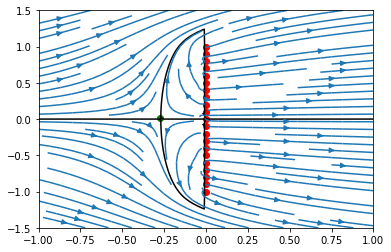

In [8]:
pyplot.figure()
pyplot.scatter(x_sources, y_sources, color='red')
pyplot.contour(X, Y, psi, levels=[0.0], colors='black') 
pyplot.streamplot(X, Y, u, v)
magn = numpy.sqrt(u**2 + v**2)
j, i = numpy.unravel_index(magn.argmin(), magn.shape)
pyplot.scatter(x[i], y[j], color='green');

In [9]:
from scipy import integrate

In [10]:
integrate.quad(lambda x: x**2, 0.0, 1.0)

(0.33333333333333337, 3.700743415417189e-15)

In [11]:
integrate.quad(lambda x, a1, a2: a1 * a2 * x**2, 0.0, 1.0, args=(2.0, 3.0))

(2.0, 2.220446049250313e-14)

In [16]:
sigma = 2
ymin, ymax = -1.0, 1.0

integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / ( x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, ymin, ymax, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_free + u_sheet
v = v_free + v_sheet

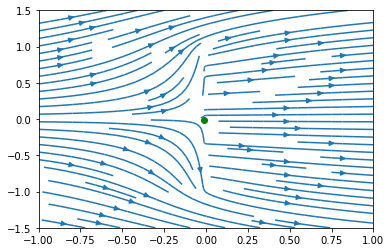

In [17]:
pyplot.figure()
#pyplot.scatter(x_sources, y_sources, color='red')
#pyplot.contour(X, Y, psi, levels=[0.0], colors='black') 
pyplot.streamplot(X, Y, u, v)
magn = numpy.sqrt(u**2 + v**2)
j, i = numpy.unravel_index(magn.argmin(), magn.shape)
pyplot.scatter(x[i], y[j], color='green');